array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002912B72F4E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002912BA3F400>]], dtype=object)

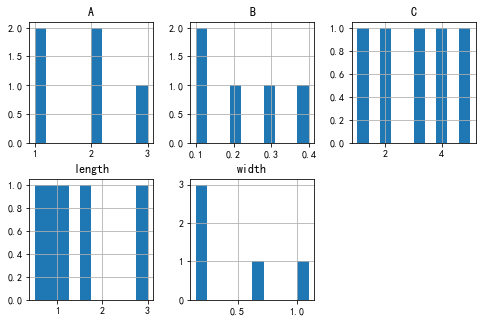

In [3]:
import pandas as pd
%matplotlib inline
df1 = pd.DataFrame({
     'length': [1.5, 0.5, 1.2, 0.9, 3],
     'width': [0.7, 0.2, 0.15, 0.2, 1.1],
    'A':[1,2,3,1,2],
    'B':[0.1,0.2,0.3,0.4,0.1],
    'C':[1,2,3,4,5]
     }, index= ['pig', 'rabbit', 'duck', 'chicken', 'horse'])
df1.hist(layout=(3,3),figsize=(8,8))


In [4]:
df1

,A,B,C,length,width
pig,1,0.1,1,1.5,0.70
rabbit,2,0.2,2,0.5,0.20
duck,3,0.3,3,1.2,0.15
chicken,1,0.4,4,0.9,0.20
horse,2,0.1,5,3.0,1.10


In [5]:
#分箱

import pandas as pd
import numpy as np
def cal_woe(input_df):
    groups = input_df.shape[0]
    #对于统计项为0的actual_0和actual_1赋值为1
    input_df.loc[input_df['actual_0']==0, 'actual_0'] = 1
    input_df.loc[input_df['actual_1']==0, 'actual_1'] = 1
    all_0 = input_df['actual_0'].sum()
    all_1 = input_df['actual_1'].sum()
    woe = []
    vi = 0
    for i in range(groups):
        tmp = ((input_df.loc[i,'actual_1']*1.0 / all_1) - (input_df.loc[i,'actual_0']*1.0 / all_0)) * \
               np.log((input_df.loc[i,'actual_1']*1.0 / all_1) / (input_df.loc[i,'actual_0']*1.0 / all_0))
        woe.append(tmp)
        vi += tmp
    input_df['woe'] = woe
    
    return input_df, vi



In [6]:
import pandas as pd
data = pd.read_csv('data2.csv',index_col=0,header=0)

In [7]:
cal_woe(data)

KeyError: 'actual_0'

https://blog.csdn.net/weixin_39751783/article/details/77372600
    
Python 信用卡评分模型 自动分箱&逻辑回归&制作评分卡

In [22]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score

warnings.filterwarnings("ignore")


def woe_more(item, df, df_woe):
    xitem = np.array(df[item])
    y = df.loc[:, 'target']
    y = np.array(y)
    x = []
    for k in xitem:
        x.append([k])
    leastentro = 100
    tt_bad = sum(y)
    tt_good = len(y) - sum(y)
    l = []
    for m in range(10):
        y_pred = KMeans(n_clusters=4, random_state=m).fit_predict(x)
        a = [[[], []], [[], []], [[], []], [[], []]]  # 第一项为所有值，第二项为违约情况
        for i in range(len(y_pred)):
            a[y_pred[i]][0].append(x[i][0])
            a[y_pred[i]][1].append(y[i])
        a = sorted(a, key=lambda x: sum(x[0]) / len(x[0]))
        if sum(a[0][1]) / len(a[0][1]) >= sum(a[1][1]) / len(a[1][1]) >= sum(a[2][1]) / len(a[2][1]) >= sum(a[3][1]) \
                / len(a[3][1]) or sum(a[0][1]) / len(a[0][1]) <= sum(a[1][1]) / len(a[1][1]) \
                <= sum(a[2][1]) / len(a[2][1]) <= sum(a[3][1]) / len(a[3][1]):
            entro = 0
            for j in a:
                entro = entro + (- (len(j[1]) - sum(j[1])) / len(j[1]) * np.log((len(j[1]) - sum(j[1])) \
                                                                                / len(j[1])) - sum(
                    j[1]) / len(j[1]) * np.log(sum(j[1])) / len(j[1]))
            if entro < leastentro:
                leastentro = entro
                l = []
                for k in a:
                    l.append([min(k[0]), max(k[0]), np.log((sum(k[1]) / (len(k[1]) - sum(k[1]))) / (tt_bad / tt_good)),
                              sum(k[1]) / len(k[1])])
                    # print (sum(k[1]),len(k[1]))
    for m in range(10):
        y_pred = KMeans(n_clusters=5, random_state=m).fit_predict(x)
        a = [[[], []], [[], []], [[], []], [[], []], [[], []]]  # 第一项为所有值，第二项为违约情况
        for i in range(len(y_pred)):
            a[y_pred[i]][0].append(x[i][0])
            a[y_pred[i]][1].append(y[i])
        a = sorted(a, key=lambda x: sum(x[0]) / len(x[0]))
        if sum(a[0][1]) / len(a[0][1]) >= sum(a[1][1]) / len(a[1][1]) >= sum(a[2][1]) / len(a[2][1]) >= sum(a[3][1]) \
                / len(a[3][1]) >= sum(a[4][1]) / len(a[4][1]) or sum(a[0][1]) / len(a[0][1]) <= sum(a[1][1]) / len(
            a[1][1]) \
                <= sum(a[2][1]) / len(a[2][1]) <= sum(a[3][1]) / len(a[3][1]) <= sum(a[4][1]) / len(a[4][1]):
            entro = 0
            for k in a:
                entro = entro + (- (len(k[1]) - sum(k[1])) / len(k[1]) * np.log((len(k[1]) - sum(k[1])) \
                                                                                / len(k[1])) - sum(
                    k[1]) / len(k[1]) * np.log(sum(k[1])) / len(k[1]))
            if entro < leastentro:
                leastentro = entro
                l = []
                for k in a:
                    l.append([min(k[0]), max(k[0]), np.log((sum(k[1]) / (len(k[1]) - sum(k[1]))) / (tt_bad / tt_good)),
                              sum(k[1]) / len(k[1])])
                    # print (sum(k[1]),len(k[1]))
    if len(l) == 0:
        return 0
    else:
        dvars[item] = []
        scores[item] = []
        df_woe[item] = [0.0] * len(y_pred)
        print('\n', "Variable:", item, ": has ", len(l), "categories")
        for m in l:
            print("span=", [m[0], m[1]], ": WOE=", m[2], "; default rate=", m[3])
            dvars[item].append([m[0], m[2]])
            scores[item].append([[m[0], m[1]], m[2]])
            for i in range(len(y_pred)):
                if m[0] <= x[i] <= m[1]:
                    df_woe[item][i] = float(m[2])
        return 1


def woe3(y_pred, item, df, df_woe):
    total_bad = sum(df['target'])
    total_good = len(df['target']) - total_bad
    woe = []
    for i in range(3):  # 因分成3类，故是3
        good, bad = 0, 0  # 每个变量未响应数和未响应数
        for j in range(len(y_pred)):
            if y_pred[j] == i:
                if df['target'][j] == 0:
                    good = good + 1
                else:
                    bad = bad + 1
        if bad == 0:
            bad = 1
        if good == 0:
            good = 1  # 若一个响应/不响应的也没有，就令其有一个，为避免0和inf。大数据下基本不会出现这种情况
        woe.append((i, np.log((bad / good) / (total_bad / total_good))))
    df_woe[item] = [0.0] * len(y_pred)
    for i in range(len(y_pred)):
        for w in woe:
            if w[0] == y_pred[i]:
                df_woe[item][i] = float(w[1])
    return woe


def woe2(x_pred, item, df, df_woe):
    total_bad = sum(df['target'])
    total_good = len(df['target']) - total_bad
    X = np.array(df[item])
    y_pred = KMeans(n_clusters=2, random_state=1).fit_predict(x_pred)  # 用聚类算法按变量位置分好类。已经不需要原始变量了
    woe = []
    judge = []
    for i in range(2):
        good, bad = 0, 0  # 每个变量未响应数和响应数
        for j in range(len(y_pred)):
            if y_pred[j] == i:
                if df['target'][j] == 0:
                    good = good + 1
                else:
                    bad = bad + 1
        judge.append([i, bad / (bad + good)])
        if bad == 0:
            bad = 1
        if good == 0:
            good = 1  # 若一个响应/不响应的也没有，就令其有一个，为避免0和inf。大数据下基本不会出现这种情况
        woe.append((i, np.log((bad / good) / (total_bad / total_good))))
    j0, j1 = [], []
    for k in range(len(y_pred)):
        if y_pred[k] == 0: j0.append(X[k])
        if y_pred[k] == 1: j1.append(X[k])
    jml = [[np.min(j0), np.max(j0)], [np.min(j1), np.max(j1)]]
    for l in range(2):
        judge[l].append(jml[l])
    judge = sorted(judge, key=lambda x: x[2])
    if judge[1][1] - judge[0][1] > 0:  # 违约率升序，则woe也升序
        woe = sorted(woe, key=lambda x: x[1])
    else:
        woe = sorted(woe, key=lambda x: x[1], reverse=True)
    dvars[item] = []
    scores[item] = []
    for i in range(2):
        # print("span=", judge[i][2], ": WOE=", woe[i][1], "; default rate=", judge[i][1])
        dvars[item].append([judge[i][2][0], woe[i][1]])
        scores[item].append([judge[i][2], woe[i][1]])
    df_woe[item] = [0.0] * len(y_pred)
    for i in range(len(y_pred)):
        for w in woe:
            if w[0] == y_pred[i]:
                df_woe[item][i] = float(w[1])


def calculate_woe(df):
    df_woe = pd.DataFrame()  # 构建一个用于存放woe的pd
    for item in list(df)[1:]:  # 连续型变量，使用聚类算法分为三类
        X = np.array(df[item])  # 原始表格中的一列
        x_pred = []
        for it in X:
            x_pred.append([it])  # 为了进行聚类，对这一列进行处理 ########
        flag = 0
        print(item, len(set(item)))
        if len(set(X)) > 4:
            res = woe_more(item, df, df_woe)
            if res == 1:
                continue
                flag = 1
        if 2 < len(set(X)) and flag == 0:
            for num in range(10):
                y_pred = KMeans(n_clusters=3, random_state=num).fit_predict(x_pred)  # 用聚类算法按变量位置分好类。已经不需要原始变量了
                judge = []
                for i in range(3):  # 因分成3类，故是3 对每一列进行操作
                    good, bad = 0, 0  # 每个变量响应数和未响应数
                    for j in range(len(y_pred)):  # ypred是那个有012的
                        if y_pred[j] == i:
                            if df['target'][j] == 0:
                                good = good + 1
                            else:
                                bad = bad + 1
                    judge.append([i, bad / (bad + good)])
                j0, j1, j2 = [], [], []
                for k in range(len(y_pred)):
                    if y_pred[k] == 0: j0.append(X[k])
                    if y_pred[k] == 1: j1.append(X[k])
                    if y_pred[k] == 2: j2.append(X[k])
                jml = [[np.min(j0), np.max(j0)], [np.min(j1), np.max(j1)], [np.min(j2), np.max(j2)]]
                for l in range(3):
                    judge[l].append(jml[l])
                judge = sorted(judge, key=lambda x: x[2])
                if (judge[1][1] - judge[0][1]) * (judge[2][1] - judge[1][1]) >= 0:
                    woe = woe3(y_pred, item, df, df_woe)
                    print('\n', "Variable:", item, ": has 3 categories")
                    if judge[1][1] - judge[0][1] > 0:  # 违约率升序，则woe也升序
                        woe = sorted(woe, key=lambda x: x[1])
                    else:
                        woe = sorted(woe, key=lambda x: x[1], reverse=True)
                    dvars[item] = []
                    scores[item] = []
                    for i in range(3):
                        print("span=", judge[i][2], ": WOE=", woe[i][1], "; default rate=", judge[i][1])
                        dvars[item].append([judge[i][2][0], woe[i][1]])
                        scores[item].append([judge[i][2], woe[i][1]])
                    flag = 1
                    break
            if flag == 0:
                print('\n', "Variable:", item, ": has 2 categories")
                woe2(x_pred, item, df, df_woe)
        else:
            print('\n', "Variable:", item, ": must be 2 categories")
            woe2(x_pred, item, df, df_woe)
    df_woe['target'] = df['target']
    tar = df_woe['target']
    df_woe.drop(labels=['target'], axis=1, inplace=True)
    df_woe.insert(0, 'target', tar)
    return (df_woe)


def calculate_iv(df):  # 计算iv值，返回一个包含列名及其对应iv值的list
    iv = []
    tar = df['target']
    tt_bad = sum(tar)
    tt_good = len(tar) - tt_bad
    for item in list(df)[1:]:
        x = df[item]
        st = set(x)
        for woe in st:
            s = 0.0
            tt = len(df[df[item] == woe]['target'])
            bad = sum(df[df[item] == woe]['target'])
            good = tt - bad
            s = s + float(bad / tt_bad - good / tt_good) * woe  # tt_bad=700,tt_good=300，坏：好=7：3
        iv.append([item, s])
    return sorted(iv, key=lambda x: x[1])


def filt_by_iv(df, method, alpha):  # 根据iv值大小筛选可供使用的变量，默认为20个
    iv_list = calculate_iv(df)
    vars_to_use = []
    if method == "thres":
        for item in iv_list:
            if item[1] > alpha:
                vars_to_use.append(item[0])
    if method == "number":
        for i in range(alpha):
            vars_to_use.append(iv_list[-i - 1][0])
    vars_to_use.append('target')
    vars_to_use.reverse()
    print("the list after iv is: ")
    print(vars_to_use)
    return df[vars_to_use]


def calculate_pear(x, y, thres=0.8):
    r = ((np.dot(x - np.mean(x), y - np.mean(y)) / (len(x) - 1)) / np.sqrt((np.cov(x) * np.cov(y))))  # 相关系数
    if abs(r) > thres:
        return 1
    return 0


def remove_pear(df, iv_list, thres=0.2):  # 两两比较变量的线性相关性，若pearson相关系数大于thres就将排序靠后的变量剔除，默认thres=0.8
    var_set = set(list(df))
    length = len(var_set)
    signals = [0] * length
    ivd = {}
    for item in iv_list:
        ivd[item[0]] = item[1]
    # 若相关性大，就在s这个list中对其做标记
    flag_list = list(var_set)
    for i in range(length):
        for j in range(i + 1, length):
            flag = calculate_pear(df.iloc[:, i], df.iloc[:, j], thres)
            if flag == 1:
                if flag_list[i] in ivd and flag_list[j] in ivd:
                    if ivd[flag_list[i]] < ivd[flag_list[j]]:
                        signals[i] = 1
                    else:
                        signals[i] = 1
    # st是所需的集合，要从中移除相关性大的变量
    for i in range(length):
        j = length - 1 - i
        if signals[j] == 1:
            var_set.remove(flag_list[j])
    print("the list after pearson is:", list(var_set))
    return list(var_set)  # 返回去除完变量后的list


def remove_vif(df, list_after_pear, list_len=20, thres=5.0):
    the_set = set(list_after_pear)
    while True:
        the_list = list(the_set)
        new_score = []
        for i in range(1, len(the_list)):
            new_df = df.drop([the_list[i]], axis=1)
            new_ar = np.array(new_df)
            new_score.append([i, variance_inflation_factor(new_ar, 0)])
        m = sorted(new_score, key=lambda x: x[1], reverse=True)[0]  # [最小的label,最小的数]
        score = m[1]
        if list_len == 0:
            if score < float(thres):
                break
        if list_len != 0:
            if score < float(thres) or len(the_set) < list_len:
                break
        the_set.remove(the_list[m[0]])
    final_list = list(the_set)
    df_final = df[final_list]
    # print (df_final.head())
    tar = df_final.pop('target')
    df_final.insert(0, 'target', tar)
    print("the list after vif is:", list(df_final))
    return df_final


def draw_roc(y_pred, y_test, ks=True):
    tprlist = []
    fprlist = []
    auc = 0
    ks_list, m1, m2, ks_value = [], [], [], 0
    for i in range(1, 1001):
        thres = 1 - i / 1000
        yp = []
        for item in y_pred:
            if item > thres:
                yp.append(1)
            else:
                yp.append(0)
        Nobs = len(y_test)
        h1 = sum(yp)
        t1 = sum(y_test)
        fn = int((sum(abs(y_test - yp)) + t1 - h1) / 2)
        tp = t1 - fn
        fp = h1 - tp
        tn = Nobs - h1 - fn
        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)
        tprlist.append(tpr)
        fprlist.append(fpr)
        ks_list.append(tpr - fpr)
    for i in range(999):
        auc = auc + (fprlist[i + 1] - fprlist[i]) * tprlist[i]
    print("auc=", auc)
    plt.plot(fprlist, tprlist)
    plt.show()
    if ks:
        for i in range(10):
            m1.append(tprlist[i * 100])
            m2.append(fprlist[i * 100])
        ks_value = max(ks_list)
        print('ks value=', ks_value)
        x1 = range(10)
        x_axis = []
        for i in x1:
            x_axis.append(i / 10)
        plt.plot(x_axis, m1)
        plt.plot(x_axis, m2)
        plt.show()
        y_pred01 = []
        for item in y_pred:
            if item > 0.5:
                y_pred01.append(1)
            else:
                y_pred01.append(0)
        print("accuracy score=", accuracy_score(y_pred01, y_test))


def logitreg(df, k=0, ks=True):
    x = df
    x1, x0 = x[x['target'] == 1], x[x['target'] == 0]
    y1, y0 = x1['target'], x0['target']
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=k)
    x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, random_state=k)
    x_train, x_test, y_train, y_test = pd.concat([x0_train, x1_train]), pd.concat([x0_test, x1_test]), pd.concat(
        [y0_train, y1_train]), pd.concat([y0_test, y1_test])
    x_train, x_test = sm.add_constant(x_train.iloc[:, 1:]), sm.add_constant(x_test.iloc[:, 1:])
    var = list(x_train)[1:]  # 备选list
    st = set()
    st.add("const")
    while True:
        pvs = []
        for item in var:
            if item not in st:
                l = list(st) + [item]
                xx = x_train[l]
                logit_mod = sm.Logit(y_train, xx)
                logitres = logit_mod.fit(disp=False)
                pvs.append([item, logitres.pvalues[item]])
        v = sorted(pvs, key=lambda x: x[1])[0]
        if v[1] < 0.05:
            st.add(v[0])
        else:
            break
        ltest = list(st)
        xtest = x_train[ltest]
        test_mod = sm.Logit(y_train, xtest)
        testres = test_mod.fit()
        for item in st:
            if testres.pvalues[item] > 0.05:
                st.remove(item)
                print("We have removed item:", item)
    print("the list to use for logistic regression:", st)
    luse = list(st)
    vars_to_del = []
    for item in dvars:
        if item not in luse:
            vars_to_del.append(item)
    for item in vars_to_del:
        dvars.pop(item)
    xuse = x_train[luse]
    logit_mod = sm.Logit(y_train, xuse)
    logit_res = logit_mod.fit()
    print(logit_res.summary())
    print("the roc and ks of train set is:")
    y_pred = np.array(logit_res.predict(x_test[luse]))
    draw_roc(y_pred, y_test, ks)
    print("the roc and ks of test set is:")
    y_ptrain = np.array(logit_res.predict(x_train[luse]))
    draw_roc(y_ptrain, y_train, ks)
    return logit_res, luse


def cal_score(res, x, dvars, q=600, p=20):
    x = x.loc[:, var_list]
    params = res.params  # 回归得到的参数
    const = params['const']
    c = pd.DataFrame([1])
    for item in var_list:
        if item != 'const':
            for i in range(1, len(dvars[item])):
                if float(x[item]) < dvars[item][i][0]:
                    c[item] = dvars[item][i - 1][1]
                    break
                if float(x[item]) >= dvars[item][-1][0]:
                    c[item] = dvars[item][-1][1]
                    break
    c = c.rename(columns={0: "const"})
    res = float(logitres.predict(c))
    # print("the result of prediction is:", float(logitres.predict(c)))
    score = q - p / np.log(2) * np.log((1 - res) / res)
    # print("the credit score is:", score)
    return (res, score)


def get_score(scores, p=20):
    for item in scores:
        for k in scores[item]:
            k[1] = k[1] * p / np.log(2)
    return scores


In [24]:
dvars = {}
scores = {}
#df = pd.read_excel("data1.xls")
df = pd.read_csv('data1.csv',index_col=0,header=0)
df.rename(columns={'y':'target'}, inplace = True)
df_of_woe = calculate_woe(df)  # 计算woe


age 3

 Variable: age : has 2 categories
xaccount_age 10

 Variable: xaccount_age : has  4 categories
span= [1.0, 12.0] : WOE= 0.0633194822769 ; default rate= 0.209804736186
span= [13.0, 40.0] : WOE= -0.0182759736762 ; default rate= 0.196597353497
span= [41.0, 75.0] : WOE= -0.0919951715776 ; default rate= 0.185213414634
span= [76.0, 145.0] : WOE= -0.206363527159 ; default rate= 0.168571428571
cred_limit 9

 Variable: cred_limit : has  4 categories
span= [1.0, 25750.0] : WOE= -0.0682605384515 ; default rate= 0.188821985487
span= [26000.0, 68000.0] : WOE= 0.0841803794935 ; default rate= 0.213284132841
span= [68500.0, 144500.0] : WOE= 0.108925991671 ; default rate= 0.217465753425
span= [146500.0, 500000.0] : WOE= 0.506518580265 ; default rate= 0.292576419214
this_bill_rate 10

 Variable: this_bill_rate : has 2 categories
this_bill_mp 9

 Variable: this_bill_mp : has  4 categories
span= [0.0, 11209.379999999999] : WOE= -0.0431692394214 ; default rate= 0.192695214106
span= [11228.9500000000

the list after iv is: 
['target', 'consume_num_session6', 'age', 'this_bill_rate', 'cred_limit', 'six_bill_avg_amt', 'consume_amt_session6', 'six_bill_num', 'xaccount_age', 'consume_amt_session', 'consume_num_session', 'mar_status_0.0', 'mar_status_2.0', 'alop_avg_amt_12m', 'six_cycle_mp_avg_amt', 'six_bill_low_repay_num', 'epp_avg_amt_12m', 'alop_nbr_12m', 'last_mp_days', 'six_cycle_mp_num', 'epp_nbr_12m']
the list after pearson is: ['consume_num_session6', 'six_cycle_mp_num', 'target', 'age']
the list after vif is: ['target', 'age', 'six_cycle_mp_num', 'consume_num_session6']
Optimization terminated successfully.
         Current function value: 0.418705
         Iterations 6
the list to use for logistic regression: {'six_cycle_mp_num', 'const'}
Optimization terminated successfully.
         Current function value: 0.418705
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:    

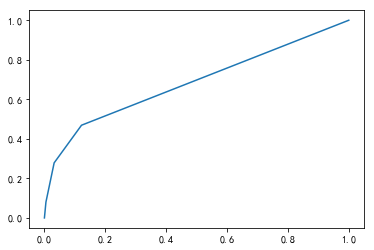

ks value= 0.347059753873


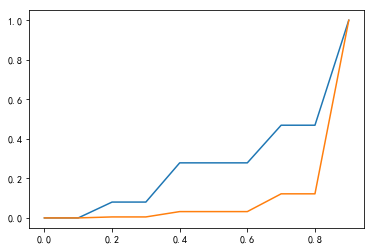

accuracy score= 0.830467812875
the roc and ks of test set is:
auc= 0.484505741782


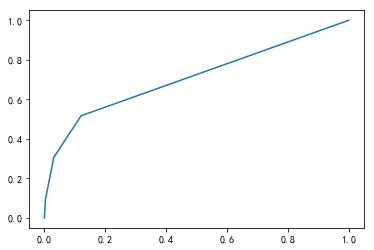

ks value= 0.396271449837


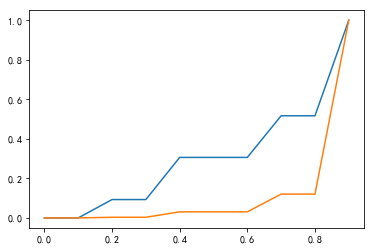

accuracy score= 0.837044939325


In [25]:
df_of_woe.to_excel("data1_woe.xlsx")  # 将得到的woe储存
df_of_woe = pd.read_excel("data1_woe.xlsx")
iv_list = calculate_iv(df_of_woe)
df_after_iv = filt_by_iv(df_of_woe, 'number', 20)  # 根据iv值选取留下的变量
df_after_pear = remove_pear(df_after_iv, iv_list, 0.1)  # 根据pearson相关系数去除线性相关性较高的变量
df_after_vif = remove_vif(df_of_woe, df_after_pear, 0, 5)  # 根据vif剔除变量，最少剩20个######
logitres, var_list = logitreg(df_after_vif, 0, ks=True)

In [15]:
x = df.iloc[2:3, 1:]  # 从原始数据集中选取一个观测
print("x for test:", x)  # 打印出来看一眼

x for test:     age  xaccount_age  cred_limit  this_bill_rate  this_bill_mp  last_mp_days  \
2  34.0          17.0     28500.0        0.792989      21336.18        9999.0   

   six_bill_num  six_bill_avg_amt  six_cycle_mp_num  six_cycle_mp_avg_amt  \
2           6.0          15406.17               0.0                   0.0   

        ...        consume_amt_session12  consume_amt_session6  \
2       ...                    206655.62             114284.77   

   consume_amt_session3  consume_amt_session  month_avg_use_year  \
2              78978.75              22600.2            0.731524   

   month_avg_use_month6  month_avg_use_month3  mar_status_0.0  mar_status_1.0  \
2              0.703291              0.923728               1               0   

   mar_status_2.0  
2               0  

[1 rows x 30 columns]


In [16]:

def calc_chiSquare(sampleSet):
    '''
    计算卡方统计量
    '''
    # 计算样本期望频率
    target_cnt = sampleSet['target'].sum()
    sample_cnt = sampleSet['target'].count()
    expected_ratio = target_cnt * 1.0/sample_cnt 
    # 对变量按属性值从大到小排序
    df = sampleSet[['var', 'target']]
    col_value = list(set(df['var']))
    col_value.sort()    
    # 对变量区间进行遍历，计算每一个区间对应的卡方统计量
    chi_list = []; target_list = []; expected_target_list = []
    for value in col_value:
        df_target_cnt = df.loc[df['var'] == value,'target'].sum()
        df_cnt = df.loc[df['var'] == value,'target'].count()
        expected_target_cnt = df_cnt * expected_ratio
        chi_square = (df_target_cnt - expected_target_cnt)**2 / expected_target_cnt
        chi_list.append(chi_square)
        target_list.append(df_target_cnt)
        expected_target_list.append(expected_target_cnt)
    # 导出结果到dataframe
    chi_result = pd.DataFrame({'var':col_value, 'chi_square':chi_list,
                               'target_cnt':target_list, 'expected_target_cnt':expected_target_list})



In [18]:
calc_chiSquare(df)

KeyError: "['var'] not in index"